# Simulating Brownian Motion of a Microparticle in Water 
#### Author: Jaime Sabal
#### Date: 20/07/20

### Introduction:

A microparticle suspended in water is subject to a fluctuating force caused by collisions with the surrounding molecules in the fluid, which, in turn, causes it to present Brownian motion dependent on the temperature and the viscosity of the fluid. When evaluating the equation of motion of a particle in a fluid such as water, it is necessary to take this randomness into account. The Langevin equation expressed below precisely does so for a particle of mass m[1]:

$$ m\frac{d^{2}}{dt^{2}}r(t) = -\gamma\frac{d}{dt}r(t) + \chi(t) \tag{1} $$

where $r(t)$ is the position of the particle at time $t$, $\gamma$ is the particle friction coefficient given by Stoke's theorem for a spherical particle of radius $a$ in a fluid with viscosity $\eta$:

$$ \gamma = 6\pi\eta a \tag{2}$$ 

and $\chi(t) = \sqrt{2k_{B}T\gamma} W(t)$ is the fluctuating force due to random impulses from the neighbouring fluid molecules; $W(t)$ is the white noise, $k_{B}$ is Boltzmann's constant and $T$ is the absolute temperature. 

A microparticle in water is usually considered to be in a low Reynolds number regime due to large viscous forces compared to inertial forces. Hence, the first term in Eq. 1 can be ignored and we are left with the final equation of motion:

$$ \frac{d}{dt}r(t) = \sqrt{2D} W(t) \tag{3} $$

where $D = \frac{k_{B}T}{\gamma}$. 

The solution to the above differential equation is called a random walk, and can be acquired through a finite difference equation. The procedure behind this approach is taken from Euler's method (first-order integration). In terms of the finite differences, we arrive to the solution of Eq. 3 iteratively through: 

$$ x_{i} = x_{i-1}+ \sqrt{2D \Delta t} W(t) \tag{4}$$

where $\Delta t$ is the time step taken between consecutive iterations. This equation is a good approximation for Brownian diffusive motion, which is what a microparticle in a fluid would undergo, since each collision alters the particles velocity and drifts it in a random direction. It is worth noting that this equation is only a good approximation for long time steps $\Delta t >> \tau$, where $\tau=\frac{m}{\gamma}$ is the time scale of the transition between smooth ballistic behaviour to diffusive behaviour. However, in the case of a microparticle of mass $m\sim 1\mu kg$, this time scale is calculated to be $\tau=59.61s$, and thus since $\Delta t$ is most usually $\leq 0.1$ this approximation applies.

In order to acquire the solution, we must generate a sequence of $w_{i}$ of uncorrelated Gaussian random numbers that have the same properties as $W(t)$ (i.e have zero mean and unitary variance), and then rescale $w_{i}$ to obtain the sequence $W_{i}=\frac{w_{i}}{\sqrt{\Delta t}}$ that has variance $\frac{1}{\sqrt{\Delta t}}$ [2]. To do this, we will use the `numpy` library and its `random.normal` function when defining our function to generate brownian motion in both one and two dimensions.

### Import Necessary Libraries

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

### Defining Necessary Constants:

In [2]:
kb = 1.38064852e-23 #Boltzmann constant (m^2*kg*s^(-2)*K^(-1))
T = 298 #absolute temperature (Kelvin, eq. to 25 deg Celsius)
m = 1e-06 #mass of microparticle (kg)
a = 1e-06 #microparticle radius (meters)
chi = 8.9e-04 #fluid viscosity (Pa*s)
gamma = 6*np.pi*chi*a #particle friction coefficient 

tau = m/gamma #time scale of transition between ballistic and diffusive behaviour (sec)
D = (kb*T)/gamma #constant used in brownian motion calculation

### Defining Function for Brownian Motion in 1D:

In [3]:
def brownian_motion1D(N,T):
    """Simulates brownian motion in one dimension.
    Parameters:
    N (int): number of discrete time steps.
    T (int): number of continuous time steps (# of seconds)
    
    Output: 
    brownian_array (1D NumPy array): array of values for the Brownian motion of a microparticle.
    rand_norm_array (1D NumPy array): array of random values that follow a Gaussian
                                     distribution.
    """
    dt = T/N #time step size
    
    #w, array of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    rand_norm_array = np.random.normal(0,1/np.sqrt(dt),N)
    
    brownian_array = [0] #initialise array for brownian motion with initial condition x(t=0)=0
    
    #loop over all random values
    for i in range(N-1):
        brownian_array.append(brownian_array[i]+np.sqrt(2*D*dt)*rand_norm_array[i])
        
    return brownian_array, rand_norm_array

### Plotting Brownian Motion of Microparticle in 1D and Random Increments for Different Step Sizes

<IPython.core.display.Javascript object>


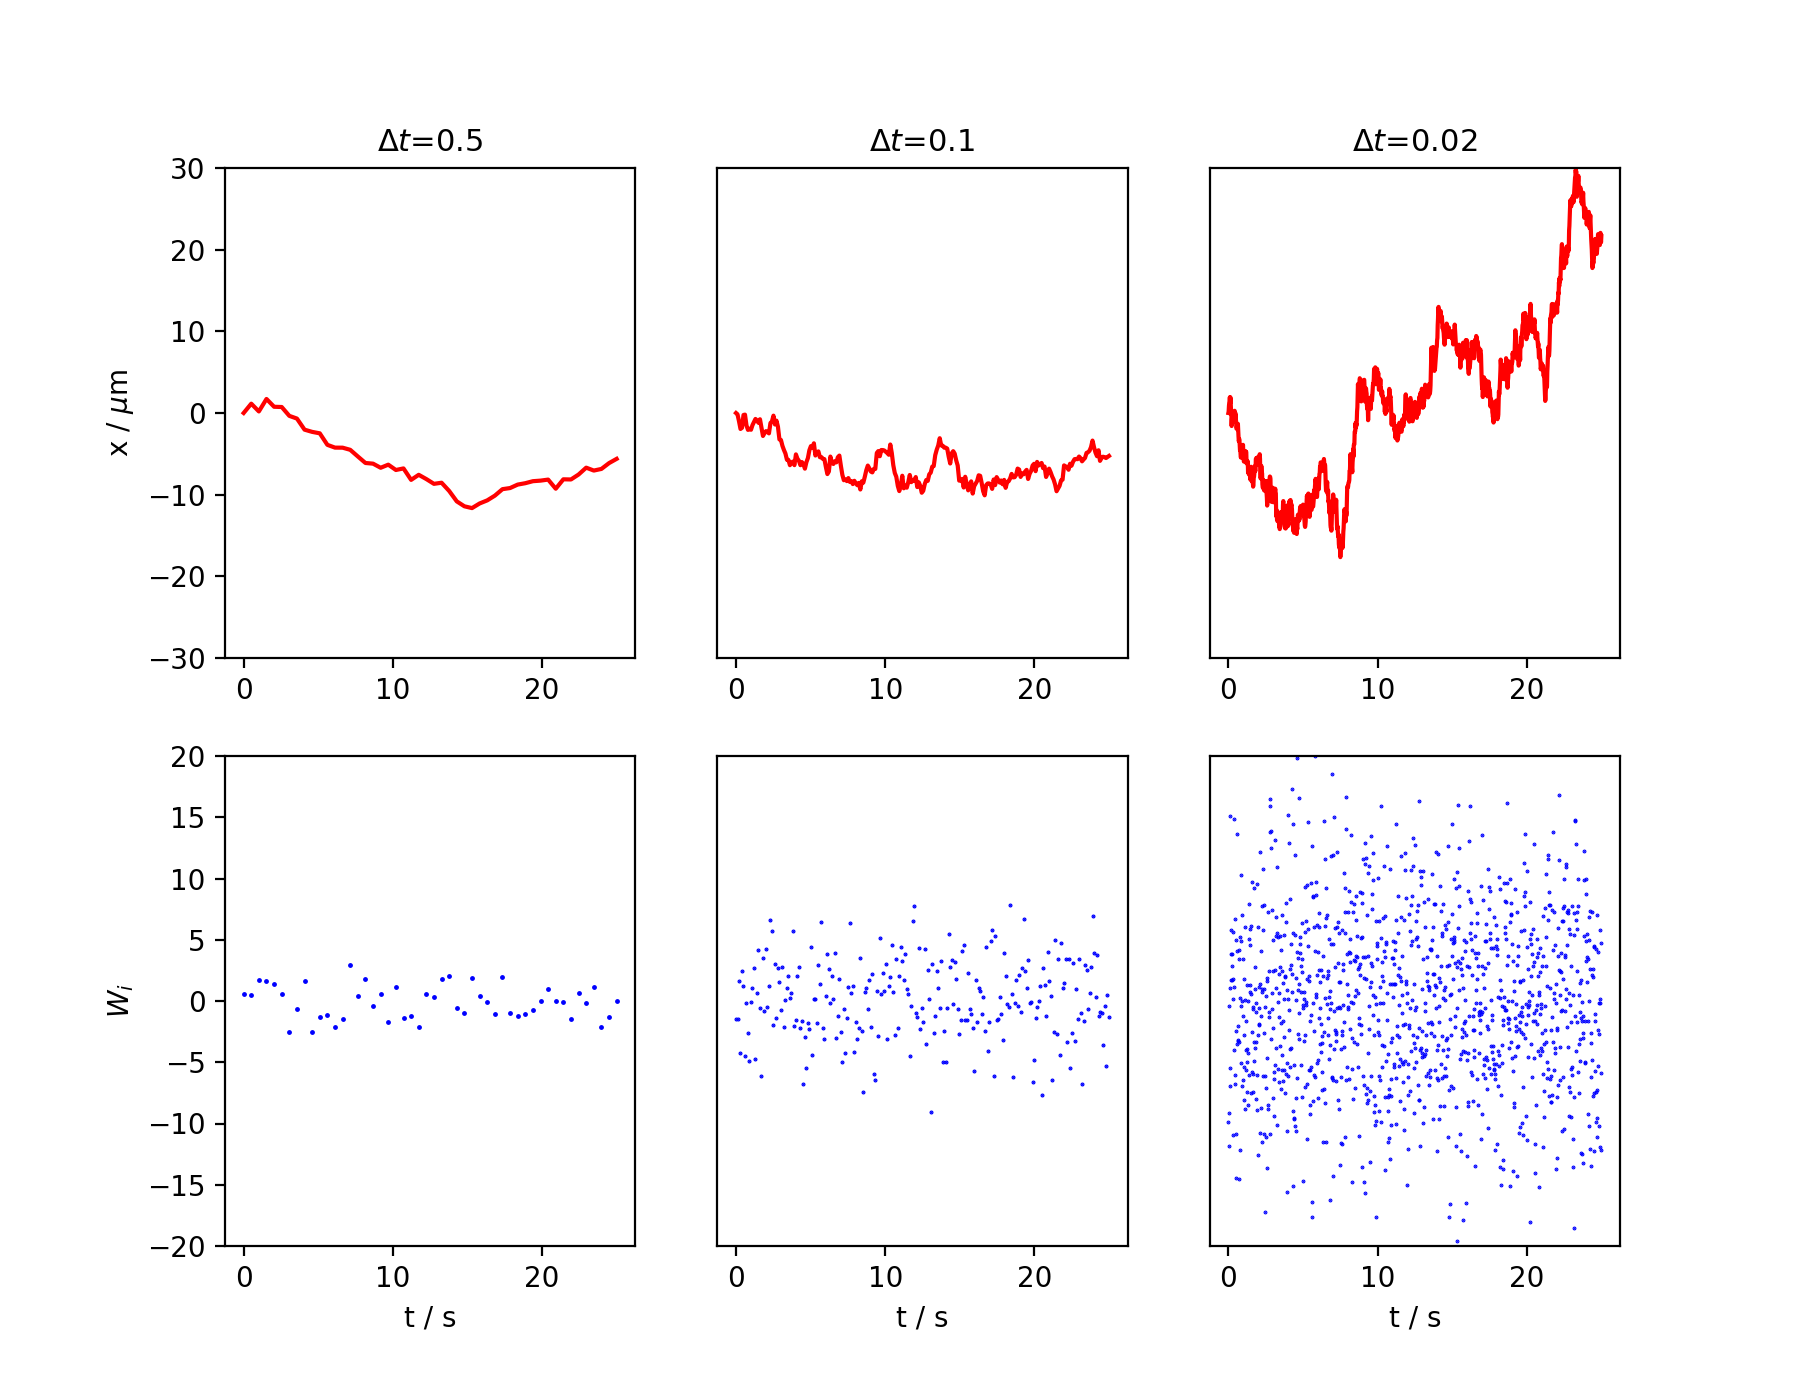

Text(0.5, 0, 't / s')

In [4]:
#discrete time steps
N_array = [50,250,1250]

T = 25 #number of seconds to plot
t = [np.linspace(0,T,N) for N in N_array] #array of time arrays for different N

#array of arrays describing motion of microparticle with different time steps
x_arrays = [np.asarray(brownian_motion1D(N,T)[0])*1e06 for N in N_array]

#arrays of random increments in particle position for different time steps
w_arrays = [np.asarray(brownian_motion1D(N,T)[1]) for N in N_array]

#add figure to plot on
fig = plt.figure(figsize=(9,7))

#1D brownian motion subplot, N=50
ax1 = fig.add_subplot(231) 
ax1.plot(t[0],x_arrays[0], "r")
ax1.set_ylim(-30,30)
ax1.set_title("$\Delta t$=%0.1f"%(T/N_array[0]), fontsize=11)
ax1.set_ylabel("x / $\mu$m")

#1D brownian motion subplot, N=250
ax2 = fig.add_subplot(232) 
ax2.plot(t[1],x_arrays[1], "r")
ax2.set_yticks([])
ax2.set_ylim(-30,30)
ax2.set_title("$\Delta t$=%0.1f"%(T/N_array[1]), fontsize=11)

#1D brownian motion subplot, N=1250
ax3 = fig.add_subplot(233) 
ax3.plot(t[2],x_arrays[2], "r")
ax3.set_yticks([])
ax3.set_ylim(-30,30)

ax3.set_title("$\Delta t$=%0.2f"%(T/N_array[2]), fontsize=11)

ax4 = fig.add_subplot(234) #1D random increments of particle subplot, N=100
ax4.plot(t[0],w_arrays[0], "b.", markersize=1.5)
ax4.set_ylim(-20,20)
ax4.set_xlabel("t / s")
ax4.set_ylabel("$W_{i}$")


ax5 = fig.add_subplot(235) #1D random increments of particle subplot, N=1000
ax5.plot(t[1],w_arrays[1], "b.", markersize=0.9)
ax5.set_ylim(-20,20)
ax5.set_yticks([])
ax5.set_xlabel("t / s")


ax6 = fig.add_subplot(236) #1D random increments of particle subplot, N=10000
ax6.plot(t[2],w_arrays[2], "b.", markersize=0.8)
ax6.set_ylim(-20,20)
ax6.set_yticks([])
ax6.set_xlabel("t / s")
#plt.savefig("Brownian1D.png");

As can be seen in the top three plots above the brownian motion, x(t), of the microparticle in water is shown. The bottom three plots show $W_{i}$, where it can be seen how the random increments increase in magnitude as $\Delta t$ decreases. This is due to the fact that the variance of these random increments is dependent on the step size by $\frac{1}{\Delta t}$, and thus diverges as $\Delta t \longrightarrow \infty$.

### Mean Square Displacement in 1D:

Now that we have plotted the Brownian motion of the microparticle in 1D, it is also interesting to look at the mean square displacement (MSD) of the particle. The MSD quantifies how much a particle moves away from its initial position. It is calculated by the equation [1]:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = \langle (x_{i}-x_{0})^{2} \rangle \tag{5}$$

where $x_{i}$ is the displacement of the particle for a given $i$, where $i \epsilon \left[ 0,N \right]$ and $N$ is the number of discrete time steps. Since we have set the initial position of the microparticle to be $x_{0}=0$, this equation simplifies to:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = \langle x_{i}^{2} \rangle \tag{6}$$

In the cell below we define a function that returns the mean square displacement for a particle undergoing Brownian motion. We then plot the MSD as a function of N, the number of discrete time steps taken. According to [1], the MSD should be linear with N as:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = 2DN\Delta t \tag{7} $$

so long as the step size $\Delta t$ is kept constant.

In [5]:
def MSD_1D(N,T):
    """Gives the 1D mean square displacement for a particle undergoing Brownian motion with 
    a time step of dt=1.
    Parameters:
    N (int): number of discrete time steps.
    T (int): number of continuous time steps.
    
    Output:
    MSD (float): mean square displacement (meters).
    """
    #step size/delay
    dt = 1
    
    #difference squared
    diff_sq = [np.square(brownian_motion1D(N,T)[0][i+1]-brownian_motion1D(N,T)[0][i]) for i in range(0,N-1)]
    
    #mean square dispalcement, calculated and theoretical
    MSD_exp = np.mean(diff_sq)
    MSD_theo = 2*D*N*dt
    
    return MSD_exp,MSD_theo

<IPython.core.display.Javascript object>


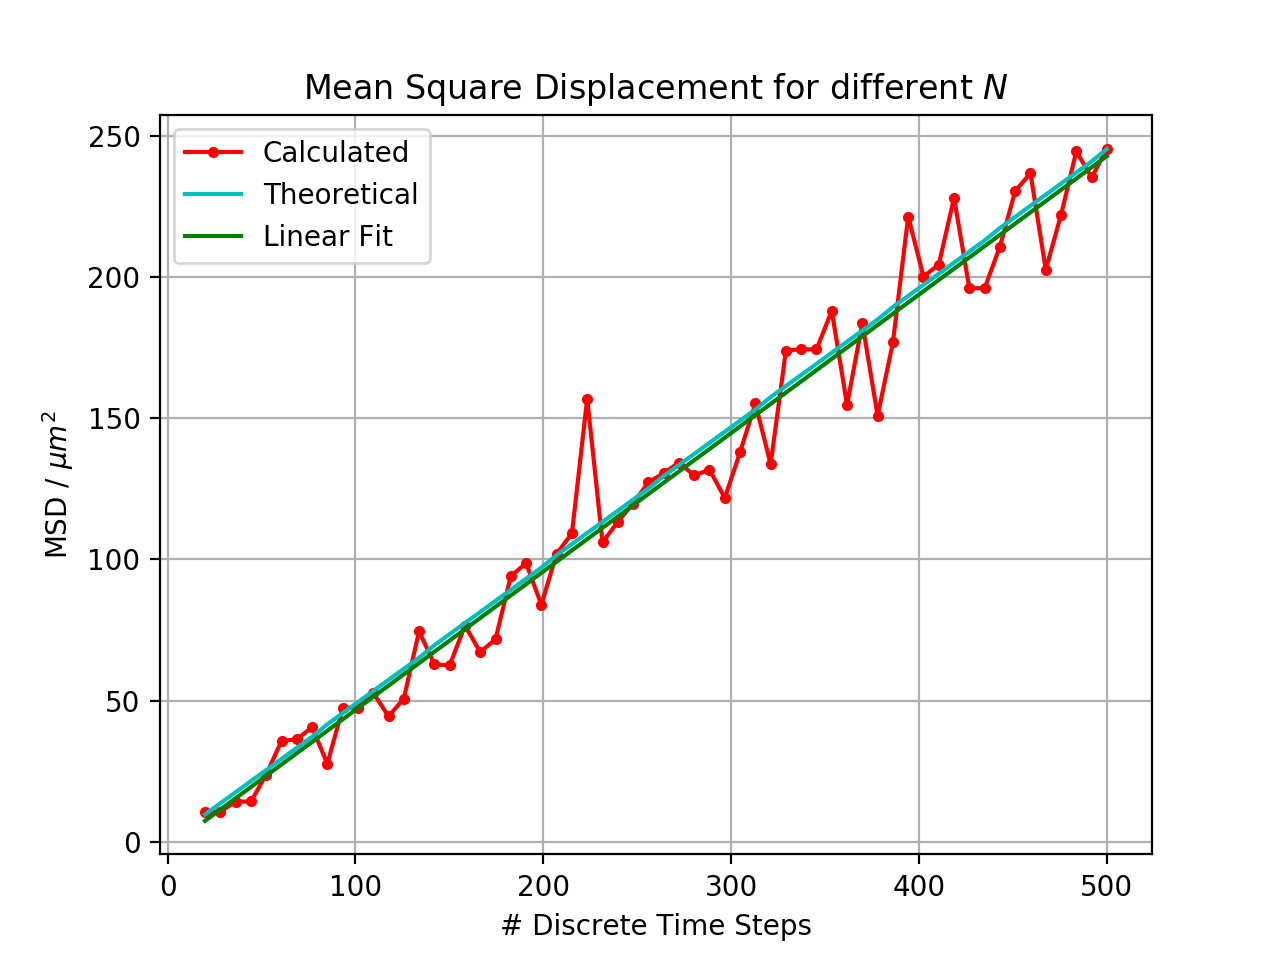

The slope of the graph is:
 0.49001726497854853


In [6]:
#make new N and dt arrays to plot MSD against dt(=T/N)
N_array_MSD = np.linspace(20,500,60)

#MSD arrays for different values of T
MSD_exp_array1 = [np.asarray(MSD_1D(int(N),T)[0])*1e12 for N in N_array_MSD]  
MSD_theo_array1 = [np.asarray(MSD_1D(int(N),T)[1])*1e12 for N in N_array_MSD]  

linear_fit = (
             np.polyfit(N_array_MSD,MSD_exp_array1,deg=1)[0]*N_array_MSD
             +np.polyfit(N_array_MSD,MSD_exp_array1,deg=1)[1]  
             )

#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title("Mean Square Displacement for different $N$")
plt.plot(N_array_MSD,MSD_exp_array1, "r.-", label="Calculated")
plt.plot(N_array_MSD,MSD_theo_array1, "c-", label="Theoretical")
plt.plot(N_array_MSD,linear_fit,"g-", label="Linear Fit")
plt.xlabel("# Discrete Time Steps")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="best");
#plt.savefig("MSD_1D.png")
print("The slope of the graph is:\n", np.polyfit(N_array_MSD,MSD_exp_array1,deg=1)[0])

### Discussion:
From the plot above, we observe how the calculated MSD fluctuates in an upward linear trend around the theoretical MSD. 

## Brownian Motion of Microparticle in 2D:

Now that we have explored the motion and MSD of a microparticle suspended in water in one dimension, the next step is to explore its motion in two dimensions, x & y. Below we define the function `brownian_motion2D` that creates both an array for the x and y positions of the microparticle.

In [8]:
def brownian_motion2D(N,T):
    """Simulates brownian motion in two dimensions.
    Parameters:
    N (int): number of discrete time steps.
    T (int): number of continuous time steps (# of seconds)
    
    Output: 
    brownian_xarray (1D NumPy array): array of x values for the Brownian motion of a microparticle.
    brownian_yarray (1D NumPy array): array of x values for the Brownian motion of a microparticle.
    
    rand_norm_array (1D NumPy array): array of random values that follow a Gaussian
                                     distribution.
    """
    dt = T/N #time step
    
    #w_x and w_y, arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    rand_norm_xarray = np.random.normal(0,1/np.sqrt(dt),N)
    rand_norm_yarray = np.random.normal(0,1/np.sqrt(dt),N)
    
    #initialise array for brownian motion with initial condition x(t=0)=0 and y(t=0)=0.
    brownian_xarray = [0] 
    brownian_yarray = [0]
    
    #loop over all random values
    for i in range(N-1):
        brownian_xarray.append(brownian_xarray[i]+np.sqrt(2*D*dt)*rand_norm_xarray[i])
        brownian_yarray.append(brownian_yarray[i]+np.sqrt(2*D*dt)*rand_norm_yarray[i])
        
    return brownian_xarray,brownian_yarray

<IPython.core.display.Javascript object>


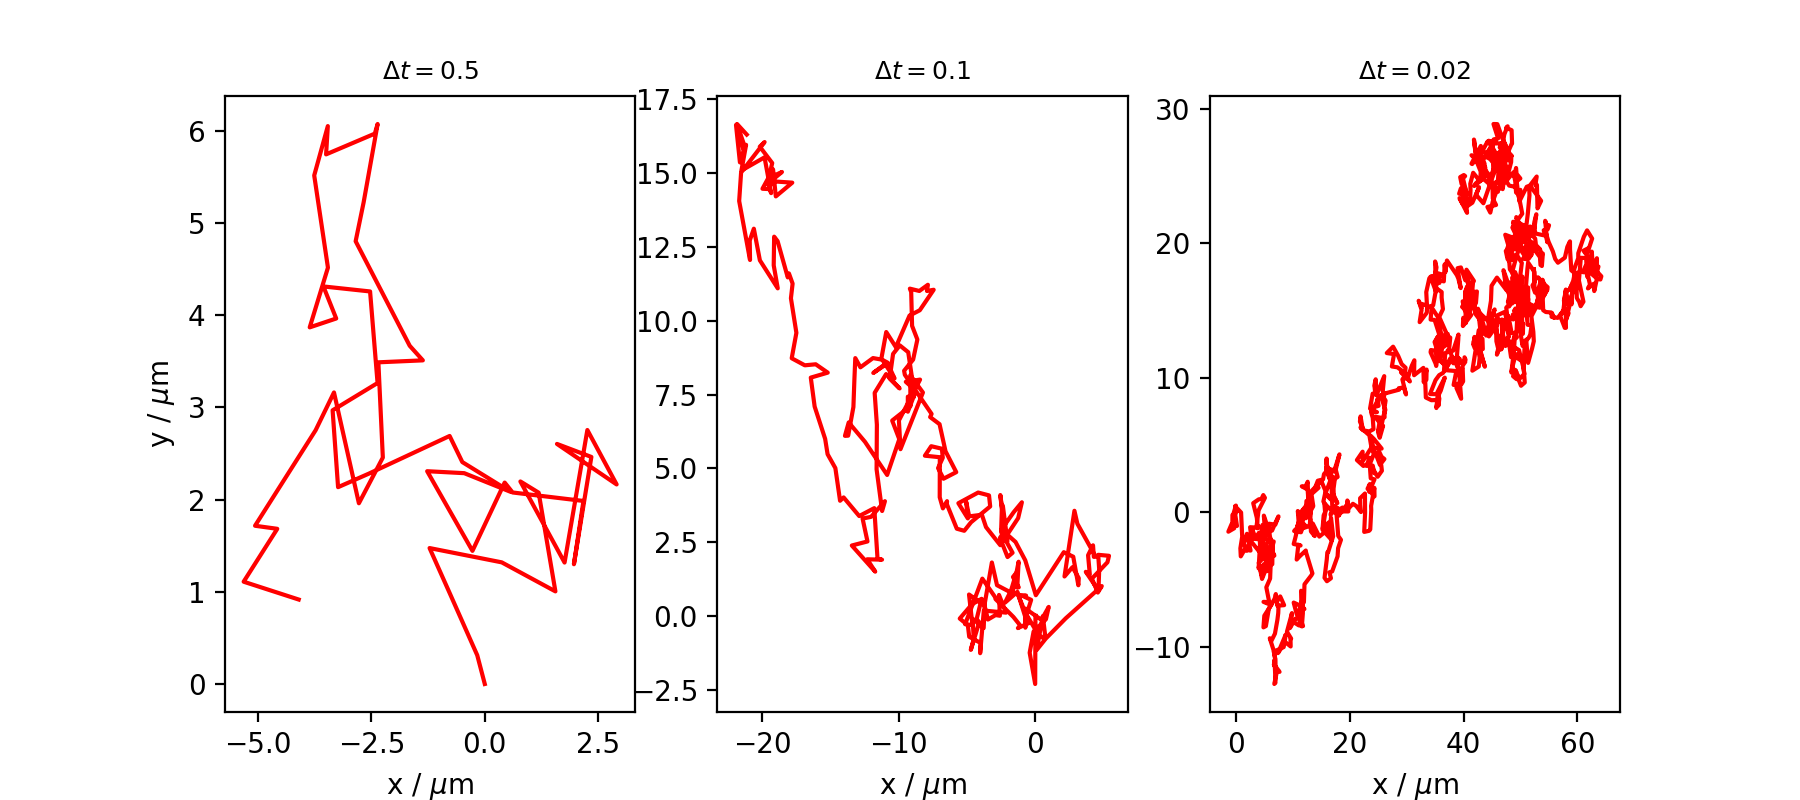

Text(0.5, 0, 'x / $\\mu$m')

In [9]:
#create x and y brownian motion arrays for N in N_array
x_arrays = [np.asarray(brownian_motion2D(N,T)[0])*1e06 for N in N_array]
y_arrays = [np.asarray(brownian_motion2D(N,T)[1])*1e06 for N in N_array]

fig = plt.figure(figsize=(9,4))

ax1 = fig.add_subplot(131)
ax1.plot(x_arrays[0],y_arrays[0], "r-")
ax1.set_title("$\Delta t=%0.1f$"%(T/N_array[0]), fontsize=9)
ax1.set_xlabel("x / $\mu$m")
ax1.set_ylabel("y / $\mu$m")

ax2 = fig.add_subplot(132)
ax2.plot(x_arrays[1],y_arrays[1], "r-")
ax2.set_title("$\Delta t=%0.1f$"%(T/N_array[1]), fontsize=9)
ax2.set_xlabel("x / $\mu$m")

ax3 = fig.add_subplot(133)
ax3.plot(x_arrays[2],y_arrays[2], "r-")
ax3.set_title("$\Delta t=%0.2f$"%(T/N_array[2]), fontsize=9)
ax3.set_xlabel("x / $\mu$m");
#plt.savefig("Brownian2D.png")

In the three subplots shown above for Brownian Motion in 2D it is clear that a a larger number of discrete time steps for a constant total time of $T=25$ (or a smaller $\Delta t$) results in a more defined movement of the particle. Now that we have shown motion in two dimensions, we can proceed to calculate the MSD for this scenario. 

### Mean Square Displacement in 2D:

Since the particle has an extra dimension to move in, the MSD is calculated from $r$, the distance travelled by the particle in the xy-plane. $r$ can be calculated in a straightworward manner using the particles' initial and final positions on the x and y axes ($\left[ x_{i},y_{i} \right]$ and $\left[ x_{i+1},y_{i+1} \right]$, respectively) and Pythagoras' Theorem for each time step such that:

$$ r = \sqrt{(x_{i+1}-x_{i})^{2}+(y_{i+1}-y_{i})^{2}} \tag{8} $$

The MSD is then simply:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = \langle r_{i}^{2} \rangle \tag{9}$$

for each displacement $r_{i}$. In the code cell below we define the function `MSD_2D` that calculates the mean square displacement for Brownian motion in two dimensions. 

In [10]:
def MSD_2D(N,T):
    """Gives the 2D mean square displacement for a particle undergoing Brownian motion with 
    a time step of dt=1.
    Parameters:
    N (int): number of discrete time steps.
    T (int): number of continuous time steps.
    
    Output:
    MSD (float): mean square displacement (meters).
    """
    #step size/delay of 1
    dt = 1
    
    #difference squared
    diff_sq = [(brownian_motion2D(N,T)[0][i+1]-brownian_motion2D(N,T)[0][i])**2
               +(brownian_motion2D(N,T)[1][i+1]-brownian_motion2D(N,T)[1])[i]**2 for i in range(0,N-1)]
    
    #mean square dispalcement, calculated and theoretical
    MSD_exp = np.mean(diff_sq)
    MSD_theo = 4*D*N*dt
    
    return MSD_exp,MSD_theo

<IPython.core.display.Javascript object>


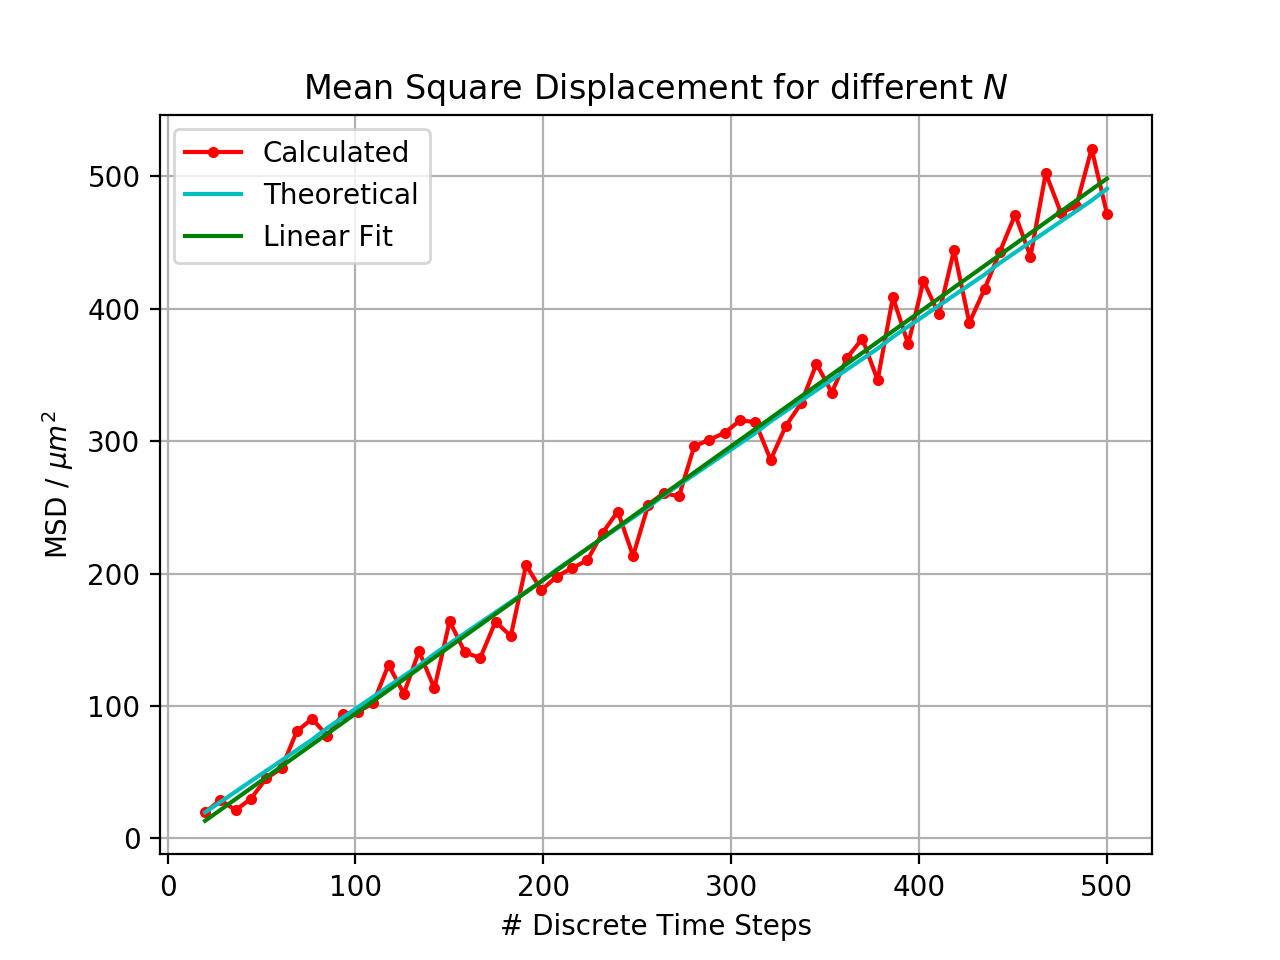

The slope of the graph is:
 1.0102118220475609


In [11]:
#MSD arrays for different values of T
MSD_exp_array2 = [np.asarray(MSD_2D(int(N),T)[0])*1e12 for N in N_array_MSD]  
MSD_theo_array2 = [np.asarray(MSD_2D(int(N),T)[1])*1e12 for N in N_array_MSD]  

linear_fit = (
             np.polyfit(N_array_MSD,MSD_exp_array2,deg=1)[0]*N_array_MSD
             +np.polyfit(N_array_MSD,MSD_exp_array2,deg=1)[1]  
             )

#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title("Mean Square Displacement for different $N$")
plt.plot(N_array_MSD,MSD_exp_array2, "r.-", label="Calculated")
plt.plot(N_array_MSD,MSD_theo_array2, "c-", label="Theoretical")
plt.plot(N_array_MSD,linear_fit,"g-", label="Linear Fit")
plt.xlabel("# Discrete Time Steps")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="best");
#plt.savefig("MSD_2D.png")
print("The slope of the graph is:\n", np.polyfit(N_array_MSD,MSD_exp_array2,deg=1)[0])

### Discussion:

The plot of MSD against $N$ in 2D is very similar to that in 1D. The only observable difference, other than the random calculated fluctuations, is the slope of the linear fit to the data. With two spatial dimensions, the calculated slope is $1.010 \mu m^{2}$ per additional step, whereas with one spatial dimension it was calculated to be $0.490 \mu m^{2}$ per additional step. It can be shown that the dependance of the MSD on the number of spatial dimensions, $n$, in in question is:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = 2Dn(N\Delta t) \tag{10}$$

Hence, our calculations are theoretically accurate since the slope of the plot in 2D is approximately twice as large as that in 1D.

## Conclusion

In this notebook, we have explored the Brownian effects on a microparticle in water. We have considered its motion in one and two spatial dimensions and calculated its mean square displacement as a function of the number of discrete time steps taken. However, we have only considered the particles equation of motion in the absence of inertial effects and a potential. In magnetophoretic control of HOPG microparticles, the particles are subject to a magnetic field gradient and thus to a magnetic potential. Hence, the next step in our exploration will be to investigate the effects of a potential in the particles motion. 

## Bibliography

[1]. Jones, P., Maragò, O. and Volpe, G., 2015. Optical Tweezers (pp. 188-218). Cambridge: Cambridge University Press.

[2]. G. Volpe and G. Volpe, “Simulation of a Brownian particle in an optical trap,” American Journal of Physics, vol. 81, no. 3, pp. 224–230, 2013.